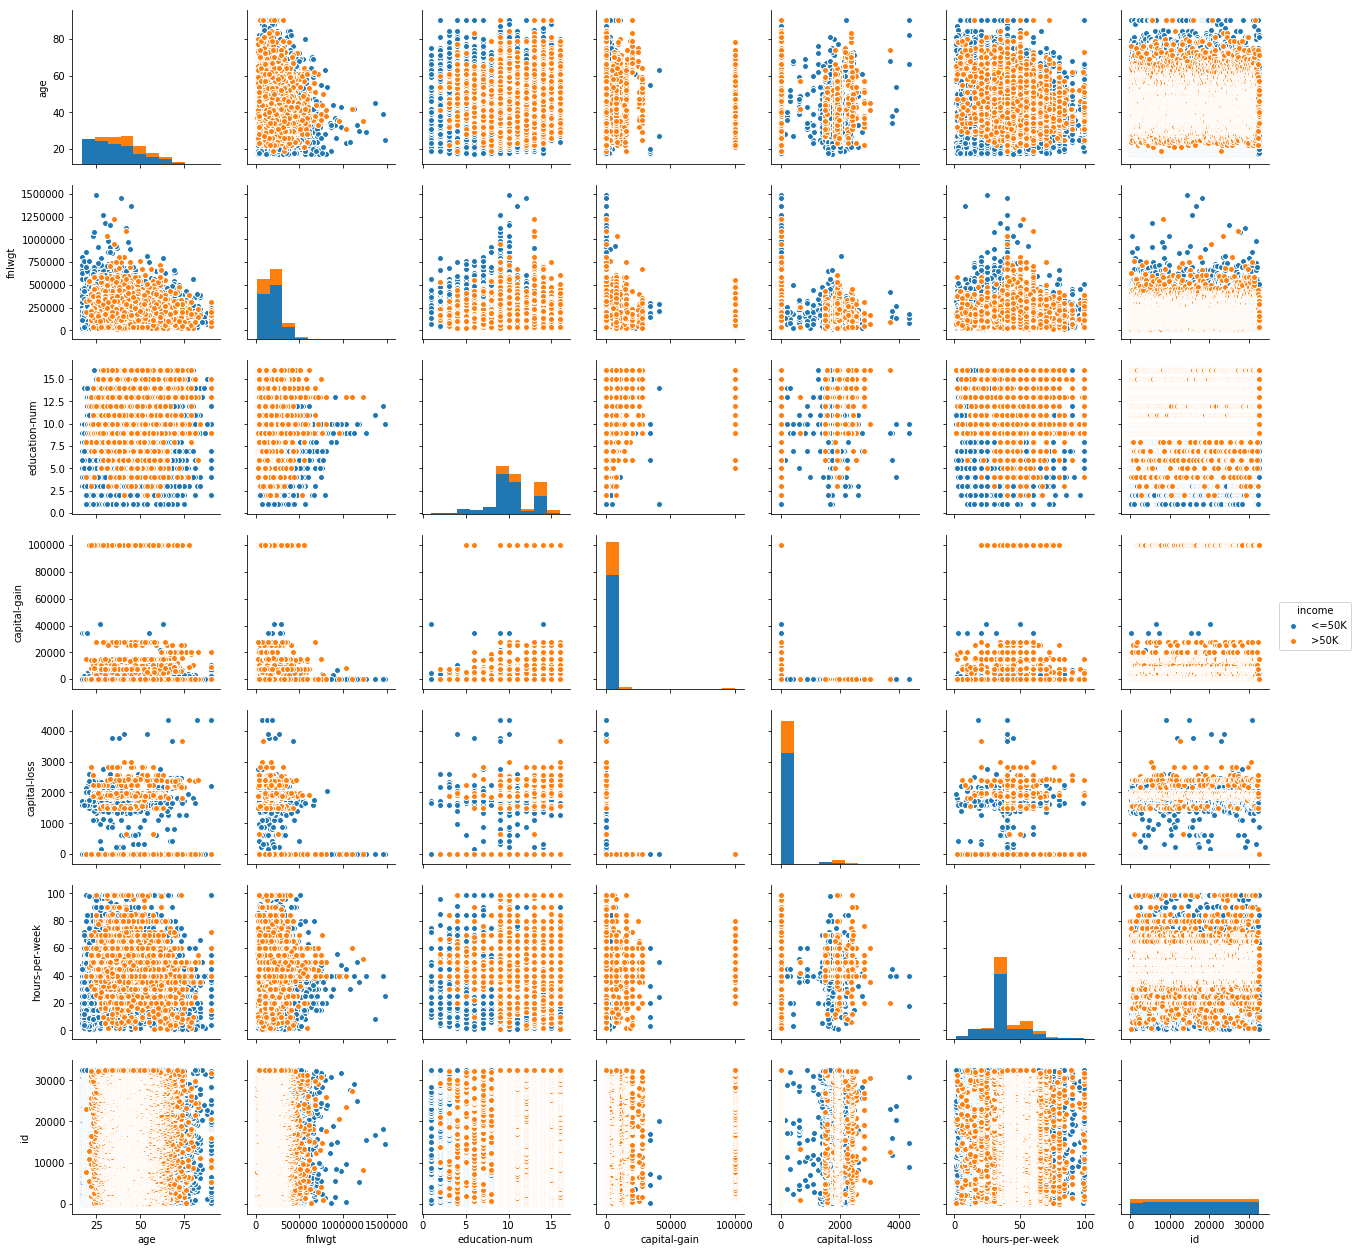

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file=pd.read_csv('E:\Internship\DAIN Studios\ml_dataset.csv',header=0)
worklass_count=file.groupby([file.worklass]).count()
#print (worklass_count)
sns.pairplot(file,hue='income')


Inference: From the above graphs, we can sense the unequal class distribution

(30162, 14)
[5 4 2 ... 2 2 3]
       age          worklass  fnlwgt  education-num         martial_status  \
0       39         State-gov   77516             13          Never-married   
1       50  Self-emp-not-inc   83311             13     Married-civ-spouse   
2       38           Private  215646              9               Divorced   
3       53           Private  234721              7     Married-civ-spouse   
4       28           Private  338409             13     Married-civ-spouse   
5       37           Private  284582             14     Married-civ-spouse   
6       49           Private  160187              5  Married-spouse-absent   
7       52  Self-emp-not-inc  209642              9     Married-civ-spouse   
8       31           Private   45781             14          Never-married   
9       42           Private  159449             13     Married-civ-spouse   
10      37           Private  280464             10     Married-civ-spouse   
11      30         State-gov  1412

<BarContainer object of 2 artists>

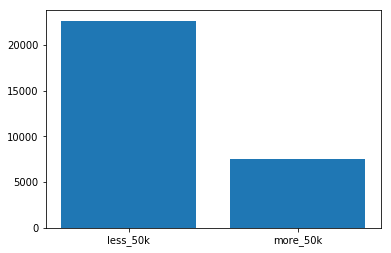

In [99]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from scipy import stats

## Reading the file
folder=Path('E:/Internship/DAIN Studios/')
file=folder/'ml_dataset.csv'
data=pd.read_csv('E:\Internship\DAIN Studios\ml_dataset.csv',header=0)  #dataframe
#print (len(data))             # total number of rows = 32561                                                          
#print (type(data))

## Data cleaning 
# Removal of columns with '?'
data_cleaned=data[(data.astype(str)!='?').all(axis=1)]
#print (data_cleaned.shape)   # number of rows after removing '?' = 30162,16 

# It is important to remove derived features such as relationship (derived from marital status) This is redundant 
# information. Also, as 'education-num' is derived from education. But we will retain 'education-num' as it includes 
# numerical data

data_cleaned=data_cleaned.drop(['education','relationship'],axis=1)
print (data_cleaned.shape)


#integer encoding of target variable - income
label_encoder = LabelEncoder()
#print (data_cleaned.income)
integer_encoded_label = label_encoder.fit_transform(data_cleaned.income)
data_cleaned['Income_integer-encoded']=integer_encoded_label
#print (data_cleaned.head)

# integer coding for nominal variables such as worklass, marital status, occupation, race, sex, native country
integer_encoded_workclass = label_encoder.fit_transform(data_cleaned.worklass)
print (integer_encoded_workclass)
data_cleaned['workclass_integer-encoded']=integer_encoded_workclass

integer_encoded_mstatus = label_encoder.fit_transform(data_cleaned.martial_status)
data_cleaned['mstatus_integer-encoded']=integer_encoded_mstatus

integer_encoded_occ = label_encoder.fit_transform(data_cleaned.occupation)
data_cleaned['occ_integer-encoded']=integer_encoded_occ

integer_encoded_race = label_encoder.fit_transform(data_cleaned.race)
data_cleaned['race_integer-encoded']=integer_encoded_race

integer_encoded_sex = label_encoder.fit_transform(data_cleaned.sex)
data_cleaned['sex_integer-encoded']=integer_encoded_sex

integer_encoded_natco = label_encoder.fit_transform(data_cleaned.native_country)
data_cleaned['natco_integer-encoded']=integer_encoded_natco
print (data_cleaned.shape)

# saving the cleaned data to drive by using pickle
filename="ML-data"
file=open(filename,'wb')
pickle.dump(data_cleaned,file)
file.close()


#label distribution
count_less=0
count_more=0
for label in integer_encoded:
    if(label==0):
        count_less+=1
    else:
        count_more+=1
print (count_less)
print (count_more)
income_cat=['less_50k','more_50k']
count_cat=[count_less,count_more]
plt.bar(income_cat,count_cat)


#Feature selection



From the above bar graph we can definitely conclude that the class representation 'income less than 50K' = 22654  and 'income more than 50K' = 7508 is unequal. This information is necessary to keep in mind while creating train and test set.

In [102]:
import sys
!{sys.executable} -m pip install imblearn 

  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


distributed 1.21.8 requires msgpack, which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Tanvi\\AppData\\Local\\Temp\\pip-uninstall-s_hw81xe\\users\\tanvi\\anaconda3\\lib\\site-packages\\sklearn\\decomposition\\cdnmf_fast.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [111]:
import sys
!{sys.executable} -m pip install keras 
!{sys.executable} -m pip install tensorflow 

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
  Running setup.py bdist_wheel for termcolor: started
  Running setup.py bdist_wheel for termcolor: finished with status 'done'
  Stored in directory: C:\Users\Tanvi\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for gast: started
  Running setup.py bdist_wheel for gast: finished with status 'done'
  Stored in directory: C:\Users\Tanvi\AppData\Local\pip\Cache\wheels\d0\e8\de\cf6666d48241d10e5d7cd53fb3b5e447ea8e659f767d669b11
  Running setup.py bdist_wheel for wrapt: started
  Running setup.py bdist_wheel for wrapt: finished with status 'done'
  Stored in directory: C:\Users\Tanvi\AppData\Local\pip\Cache\wheels\d7\de\2e\efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd
  Running setup.py bdist_wheel for absl-py: started
  Running setup.py bdist_wheel for absl-py: finish

distributed 1.21.8 requires msgpack, which is not installed.
tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 39.1.0 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Tanvi\\AppData\\Local\\Temp\\pip-uninstall-madvjoxf\\users\\tanvi\\anaconda3\\lib\\site-packages\\numpy\\core\\multiarray.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


C:\Users\Tanvi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


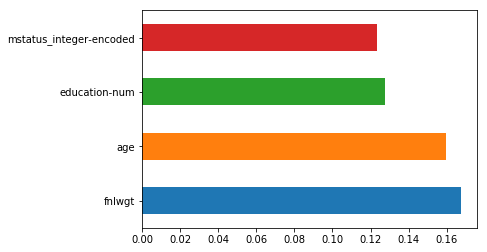

Predicted     0     1
Actual               
0          4933   722
1           879  1007
0.7876939397957831


In [6]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
                                    

# loading the object
filename='ML-data'
fileObject=open(filename,'rb')
data=pickle.load(fileObject)
#print (data.columns)

#subset data 
sub_data=data[['age','fnlwgt','education-num','capital-gain', 'capital-loss',
       'hours-per-week','workclass_integer-encoded','mstatus_integer-encoded', 'occ_integer-encoded',
       'race_integer-encoded', 'sex_integer-encoded', 'natco_integer-encoded']]
#sub_data

# feature selection 
model = ExtraTreesClassifier()
model.fit(sub_data,data['Income_integer-encoded'])
feat_importances = pd.Series(model.feature_importances_, index=sub_data.columns)
feat_importances.nlargest(4).plot(kind='barh')          
#4 top features selected based on the common notion of square root of total number of features
plt.show()
# Comments: Based on the horizontal bar graph, following features - fnlwgt, 
#age, marital status and education-num will be further used for classification

data_modeling=data[['fnlwgt','age','mstatus_integer-encoded','education-num']]

## As there is under-representation of data from one class, we will use SMOTE method of oversampling

# SMOTE (Synthetic Minority Over-sampling Technique) # imblearn module not found, unable to install
#sampler = SMOTE(ratio={1: 22654, 0: 7508},random_state=0)
#X_rs, y_rs = sampler.fit_sample(data_modeling,data['Income_integer-encoded'] )
#print('SMOTE {}'.format(Counter(y_rs)))
#plot_this(X_rs,y_rs)


# splitting data into test set and training set
X_train, X_test, y_train, y_test = train_test_split(data_modeling, data['Income_integer-encoded'], test_size = 0.25, random_state = 21)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 7, oob_score = True)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))
print (accuracy_score(y_test, y_pred))
# Thus the accuracy is 78.76%

Random forest classifier gives an accuracy of 78.76%

In [14]:
# date: 05/10/19
# for imbalanced dataset, it is important to calculate other metrics such as precision, recall for model evaluation
from sklearn.metrics import *
#sklearn.metrics.recall_score, sklearn.metrics.precision_score, sklearn.metrics.f1_score

average_precision = average_precision_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)


print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print ('precision',precision)
print ('Recall score', recall)
print ('F1 score', f1)
print ('ROC-AUC',roc_auc_score(y_test,y_pred))

Average precision-recall score: 0.43
precision 0.5824175824175825
Recall score 0.5339342523860021
F1 score 0.5571230982019364
ROC-AUC 0.7031298140798269


From the above metrics, we realise that class imbalance has resulted in over-fitting and therefore need to follow certain 
sampling methods

In [ ]:
# date: 05/10/19
# oversampling method for class imbalance
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
>>> from collections import Counter
>>> print(sorted(Counter(y_resampled).items()))

% Labels with income >50k is : 24.892248524633644
% Labels with income <50k is : 75.10775147536636


C:\Users\Tanvi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


dict_keys(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Craft-repair', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']) dict_values([3721, 3992, 1350, 4038, 3212, 3584, 1572, 989, 1966, 912, 4030, 644, 9, 143])


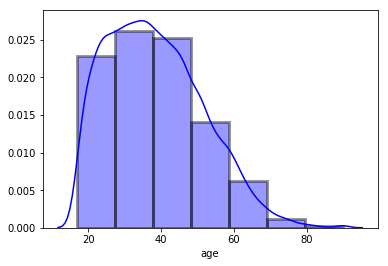

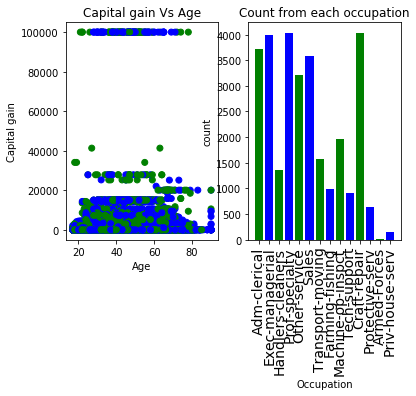

In [53]:
####date: 16th Sept
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filename='ML-data'
file_open=open(filename,'rb')
data = pickle.load(file_open)
#print (data.head)
#data.describe()
#print (data.columns)
count_less=0
count_more=0
count_total=0
for label in data['Income_integer-encoded']:
    count_total+=1
    if(label==0):
        count_less+=1
    else:
        count_more+=1
#print (count_less)
print ("% Labels with income >50k is :",(count_more/count_total)*100)
print ("% Labels with income <50k is :",(count_less/count_total)*100)
#income_cat=['less_50k','more_50k']
#count_cat=[count_less,count_more]
#plt.bar(income_cat,count_cat)

## seperating categorical and numerical variables from each other
num_data=data[['id','age','fnlwgt','education-num','capital-gain','capital-loss','Income_integer-encoded']]
#print (num_data.describe()) age minimum=17 & maximum=90 range=max-min=73
#print (num_data['age'])

sns.distplot(num_data['age'],bins=int(73/10),hist=True,kde=True,color='blue',hist_kws={'edgecolor':'black','linewidth': 3})
# plotting histogram to show distribution of age
fig, (ax1, ax2) = plt.subplots(1, 2)


ax1.scatter(num_data['age'],num_data['capital-gain'],color=['green','blue'],label=num_data['Income_integer-encoded'])
ax1.set(xlabel='Age',ylabel='Capital gain')
ax1.set_title('Capital gain Vs Age')

cat_data=data[['id','worklass','martial_status','occupation','race','sex','native_country','income','Income_integer-encoded']]
b = {}
for item in cat_data['occupation']:
    b[item] = b.get(item, 0) + 1
names_occ=b.keys()
values=b.values()
print(names_occ,values)
#color=['green','blue']
ax2.bar(names_occ,values,color=['green','blue'],label=num_data['Income_integer-encoded'])
ax2.set(xlabel='Occupation',ylabel='count')
plt.setp(ax2.get_xticklabels(), rotation='vertical', fontsize=14)
ax2.set_title('Count from each occupation')
plt.show()
#cat_data


np.corrcoef(num_data)

The above percentage clearly shows the unequla class distribution. This would mean that out predictor will be 
able to provide us with an accuracy of 75%. The problem here would be to predict the labels: Income >50k


In [46]:
# plotting histogram to show distribution of age and income together
#income_more = num_data[num_data['Income_integer-encoded'] == 1]
#print (type(income_more))
#sns.distplot(income_more,bins=int(73/10),hist=False,kde=True,hist_kws={'shade':True,'linewidth': 3},label='>50k')

#income_less =num_data[num_data['Income_integer-encoded'] == 0]
#sns.distplot(income_less,bins=int(73/10),hist=True,kde=True,color='red',hist_kws={'edgecolor':'black','linewidth': 3})
 

# Plot formatting
#plt.legend(prop={'size': 12})
#plt.title('Age and Income')
#plt.xlabel('Age (years)')
#plt.ylabel('Density')


In [37]:
import sys
!{sys.executable} -m pip install collections

  Could not find a version that satisfies the requirement collections (from versions: )
No matching distribution found for collections
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [45]:

cat_data=data[['id','worklass','martial_status','occupation','race','sex','native_country','income','Income_integer-encoded']]
#category=np.unique(cat_data['occupation'])
#a=list(cat_data['occupation'].items())
#a
b = {}
for item in cat_data['occupation']:
    b[item] = b.get(item, 0) + 1
b.keys()
b.values()

dict_values([3721, 3992, 1350, 4038, 3212, 3584, 1572, 989, 1966, 912, 4030, 644, 9, 143])